In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# Load ORB detector
orb = cv2.ORB_create()

# Load saved descriptors
loaded_data = np.load('/Users/vigneshalle/Downloads/fake currency/model/model.npz')
real_descriptors = [loaded_data[key] for key in loaded_data]


In [38]:
# Initialize BFMatcher with Lowe’s Ratio Test
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)

def classify_uploaded_image(uploaded_img_path):
    """Classifies an uploaded image based on ORB pattern matching and displays it in color."""
    
    img = cv2.imread(uploaded_img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    if img is None:
        print("❌ Error: Unable to load uploaded image!")
        return

    keypoints, descriptors = orb.detectAndCompute(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), None)
    
    if descriptors is None:
        print("⚠️ Warning: No keypoints detected in uploaded image!")
        return

    # Apply Lowe's ratio test
    max_good_matches = 0
    for real_desc in real_descriptors:
        matches = bf.knnMatch(descriptors, real_desc, k=2)
        good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]
        if len(good_matches) > max_good_matches:
            max_good_matches = len(good_matches)

    # Increase threshold
    threshold = 100  

    if max_good_matches >= threshold:
        result_text = f"\033[92m✅ Real Currency (Matches: {max_good_matches})\033[0m"
        result_color = "green"
    else:
        result_text = f"\033[91m❌ Fake Currency (Matches: {max_good_matches})\033[0m"
        result_color = "red"

    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Uploaded Image", fontsize=14, color=result_color)
    plt.show()

    print(result_text)

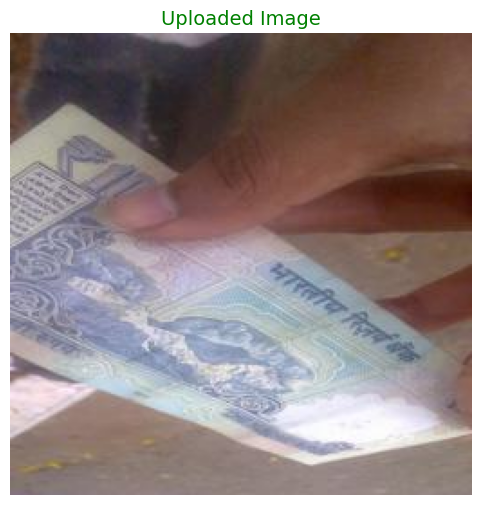

✅ Real Currency (Matches: 135)


In [24]:
# Example usage
uploaded_image_path = '/Users/vigneshalle/Downloads/fake currency/test/100_original_3.jpg_60328963-86aa-4e73-9259-fd4cf2af5a1a.jpg'  # Change to actual image path
classify_uploaded_image(uploaded_image_path)

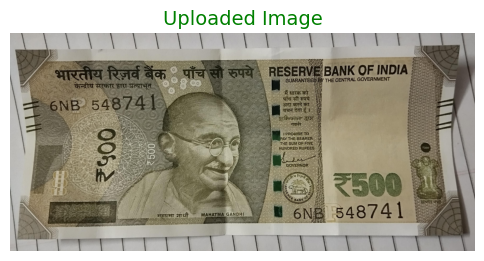

✅ Real Currency (Matches: 179)


In [26]:
# Example usage
uploaded_image_path = '/Users/vigneshalle/Documents/fake currency/WhatsApp Image 2025-01-30 at 23.07.52.jpeg'  # Change to actual image path
classify_uploaded_image(uploaded_image_path)

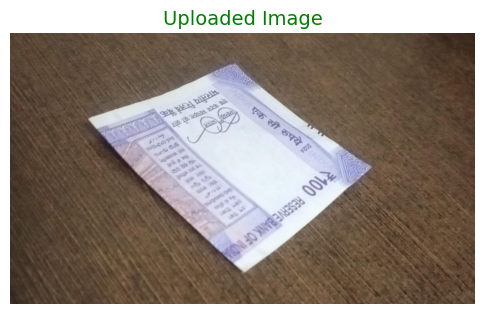

✅ Real Currency (Matches: 144)


In [28]:
# Example usage
uploaded_image_path = '/Users/vigneshalle/Documents/fake currency/WhatsApp Image 2025-02-13 at 12.06.52.jpeg'
classify_uploaded_image(uploaded_image_path)

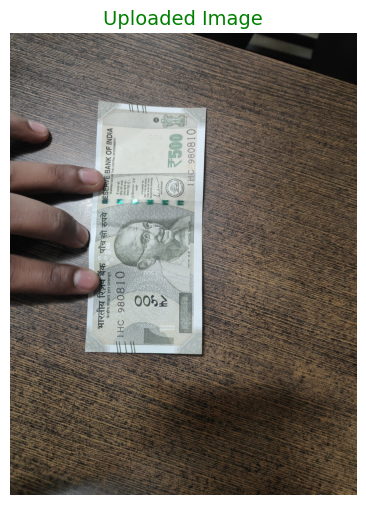

✅ Real Currency (Matches: 159)


In [30]:
# Example usage
uploaded_image_path = '/Users/vigneshalle/Documents/fake currency/WhatsApp Image 2025-02-13 at 12.23.01.jpeg' 
classify_uploaded_image(uploaded_image_path)

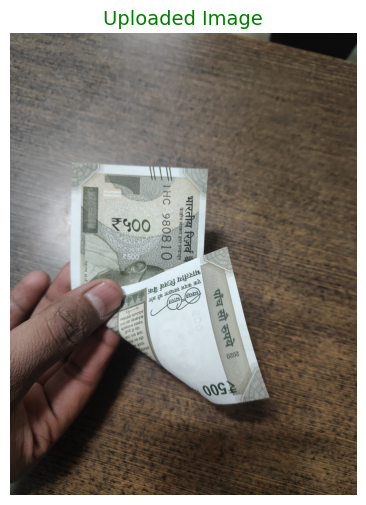

✅ Real Currency (Matches: 153)


In [32]:
# Example usage
uploaded_image_path = '/Users/vigneshalle/Documents/fake currency/WhatsApp Image 2025-02-13 at 12.22.59.jpeg'
classify_uploaded_image(uploaded_image_path)

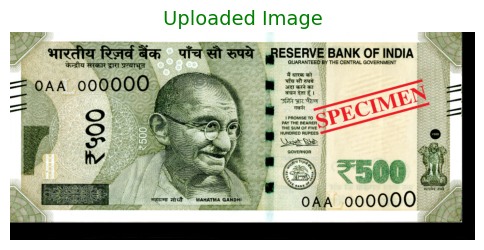

✅ Real Currency (Matches: 101)


In [40]:
# Example usage
uploaded_image_path = '/Users/vigneshalle/Documents/fake currency/500-note-front.png'
classify_uploaded_image(uploaded_image_path)